In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from math import exp
from math import log
train = pd.read_csv('C:\\Users\\gaexp\\OneDrive\\Documents\\Machine Learning\\Homework\\[2017]ML_HW2\\Data\\train.csv',header=None)
test = pd.read_csv('C:\\Users\\gaexp\\OneDrive\\Documents\\Machine Learning\\Homework\\[2017]ML_HW2\\Data\\test.csv',header=None)

In [3]:
#setting fi function
fi = pd.DataFrame()
for i in range(148):
    fi[i] = train.loc[i,3:]
    fi[i] = np.array(fi[i].values)
t1 = train[0]
t2 = train[1]
t3 = train[2]

In [4]:
#initial w to be 0
w1 = np.zeros(shape=(1,13))
w2 = np.zeros(shape=(1,13))
w3 = np.zeros(shape=(1,13))

In [5]:
#setting a
a1 = pd.DataFrame()
a2 = pd.DataFrame()
a3 = pd.DataFrame()
for i in range(148):
    a1[i] = np.dot(w1,fi[i])
    a2[i] = np.dot(w2,fi[i])
    a3[i] = np.dot(w3,fi[i])

In [6]:
#setting y
y = pd.DataFrame()
y1 = pd.DataFrame()
y2 = pd.DataFrame()
y3 = pd.DataFrame()
for i in range(148):
    y1[i] = np.exp(a1[i].values)/(np.exp(a1[i].values)+np.exp(a2[i].values)+np.exp(a3[i].values))
    y2[i] = np.exp(a2[i].values)/(np.exp(a1[i].values)+np.exp(a2[i].values)+np.exp(a3[i].values))
    y3[i] = np.exp(a3[i].values)/(np.exp(a1[i].values)+np.exp(a2[i].values)+np.exp(a3[i].values))

In [7]:
#setting the gradient of error function
E1 = pd.DataFrame()
E2 = pd.DataFrame()
E3 = pd.DataFrame()
e1 = np.zeros(shape=(1,13))
e2 = np.zeros(shape=(1,13))
e3 = np.zeros(shape=(1,13))
for i in range(148):
    E1[i] = (((y1[i]-t1[i]).values)*fi[i])
    E2[i] = (((y2[i]-t2[i]).values)*fi[i])
    E3[i] = (((y3[i]-t3[i]).values)*fi[i])
    e1 = e1+ E1[i].values
    e2 = e2+ E2[i].values
    e3 = e3+ E3[i].values

In [8]:
#setting Hessian Matrix
h1_1 = np.zeros(shape=(1,13))
h1 = np.zeros(shape=(1,13))
h2_1 = np.zeros(shape=(1,13))
h2 = np.zeros(shape=(1,13))
h3_1 = np.zeros(shape=(1,13))
h3 = np.zeros(shape=(1,13))
for i in range(148):
    h1_1 = ((y1[i].values)*(1-y1[i].values)*(fi[i].values[np.newaxis].T*fi[i].values))
    h1 = h1+h1_1
    h2_1 = ((y2[i].values)*(1-y2[i].values)*(fi[i].values[np.newaxis].T*fi[i].values))
    h2 = h2+h2_1
    h3_1 = ((y3[i].values)*(1-y3[i].values)*(fi[i].values[np.newaxis].T*fi[i].values))
    h3 = h3+h3_1

In [9]:
# 牛頓法train w
w_new1 = w1
w_new2 = w2
w_new3 = w3
error = []
error2 = 1
accu=[]
while(error2>0.005):
    n=0
    error2 = 0
    w_new1 = w_new1 - np.dot(e1,inv(h1.transpose()))
    w_new2 = w_new2 - np.dot(e2,inv(h2.transpose()))
    w_new3 = w_new3 - np.dot(e3,inv(h3.transpose()))
    for i in range(148):
        a1[i] = np.dot(w_new1,fi[i])
        a2[i] = np.dot(w_new2,fi[i])
        a3[i] = np.dot(w_new3,fi[i])
        y1[i] = np.exp(a1[i].values)/(np.exp(a1[i].values)+np.exp(a2[i].values)+np.exp(a3[i].values))
        y2[i] = np.exp(a2[i].values)/(np.exp(a1[i].values)+np.exp(a2[i].values)+np.exp(a3[i].values))
        y3[i] = np.exp(a3[i].values)/(np.exp(a1[i].values)+np.exp(a2[i].values)+np.exp(a3[i].values))
        #判別accuracy
        if (y1[i][0]>y2[i][0]):
            y[i] = y1[i]
            if(y[i][0]>y3[i][0]):
                y[i] = y1[i]
                if(y[i][0]==t1[i]):
                    n+=1
            else:
                y[i] = y3[i] 
                if(y[i][0]==t3[i]):
                    n+=1
        else:
            y[i] = y2[i]
            if(y[i][0]>y3[i][0]):
                y[i] = y2[i]
                if(y[i][0]==t2[i]):
                    n+=1
            else:
                y[i] = y3[i]
                if(y[i][0]==t3[i]):
                    n+=1
        error1 = -(t1[i]*log(y1[i])+t2[i]*log(y2[i])+t3[i]*log(y3[i]))
        error2 = error2+error1
    error.append(error2)
    #更新gradient E and Hessian matrix
    for i in range(148): 
        E1[i] = (((y1[i]-t1[i]).values)*fi[i])
        E2[i] = (((y2[i]-t2[i]).values)*fi[i])
        E3[i] = (((y3[i]-t3[i]).values)*fi[i])
        e1 = e1+ E1[i].values
        e2 = e2+ E2[i].values
        e3 = e3+ E3[i].values
        h1_1 = ((y1[i].values)*(1-y1[i].values)*(fi[i].values[np.newaxis].T*fi[i].values))
        h1 = h1+h1_1
        h2_1 = ((y2[i].values)*(1-y2[i].values)*(fi[i].values[np.newaxis].T*fi[i].values))
        h2 = h2+h2_1
        h3_1 = ((y3[i].values)*(1-y3[i].values)*(fi[i].values[np.newaxis].T*fi[i].values))
        h3 = h3+h3_1
    accu.append(n/148)

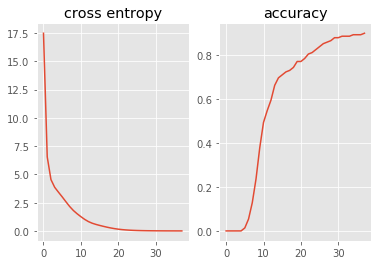

In [10]:
#plot accuracy and error_cross entropy
plt.style.use('ggplot')
plt.subplot(121)
plt.plot(range(len(error)),error)
plt.title('cross entropy')
plt.subplot(122)
plt.plot(range(len(accu)),accu)
plt.title('accuracy')
plt.show()

In [11]:
#classification result of test data
fi = pd.DataFrame()
c = []
for i in range(len(test)):
    fi[i] = test.loc[i,:]
    fi[i] = np.array(fi[i].values)
    a1[i] = np.dot(w_new1,fi[i])
    a2[i] = np.dot(w_new2,fi[i])
    a3[i] = np.dot(w_new3,fi[i])
    y1[i] = np.exp(a1[i].values)/(np.exp(a1[i].values)+np.exp(a2[i].values)+np.exp(a3[i].values))
    y2[i] = np.exp(a2[i].values)/(np.exp(a1[i].values)+np.exp(a2[i].values)+np.exp(a3[i].values))
    y3[i] = np.exp(a3[i].values)/(np.exp(a1[i].values)+np.exp(a2[i].values)+np.exp(a3[i].values))
    if(y1[i][0]>y2[i][0]):
        y[i] = y1[i]
        if(y[i][0]>y3[i][0]):
            c.append('class1')
        else:
            c.append('class3')
    else:
        y[i] = y2[i]
        if(y[i][0]>y3[i][0]):
            c.append('class2')
        else:
            c.append('class3')     

In [12]:
#the classification of testing data
print(pd.DataFrame({'classification':c})[:10])
print(pd.DataFrame({'classification':c})[10:20])
print(pd.DataFrame({'classification':c})[20:])

  classification
0         class3
1         class3
2         class3
3         class3
4         class3
5         class3
6         class3
7         class3
8         class3
9         class3
   classification
10         class2
11         class2
12         class2
13         class2
14         class2
15         class2
16         class2
17         class2
18         class2
19         class3
   classification
20         class1
21         class1
22         class1
23         class1
24         class1
25         class1
26         class1
27         class1
28         class1
29         class1


In [13]:
hist1 = pd.DataFrame()
hist2 = pd.DataFrame()
hist3 = pd.DataFrame()
for i in range(13):
    hist1[i] = train.loc[:48,i+3]
    hist2[i] = train.loc[49:109,i+3]
    hist3[i] = train.loc[110:147,i+3]

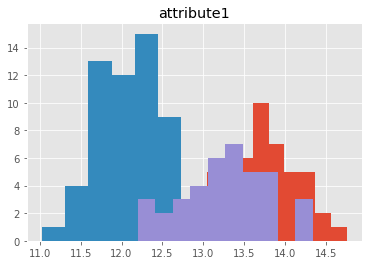

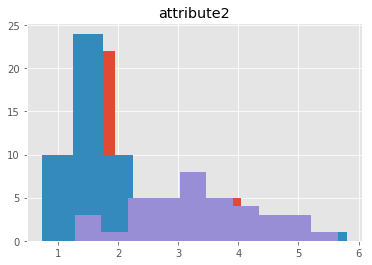

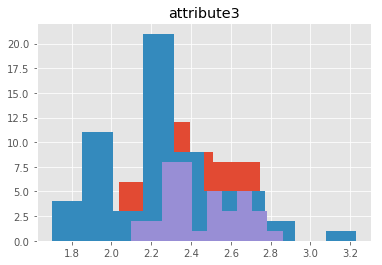

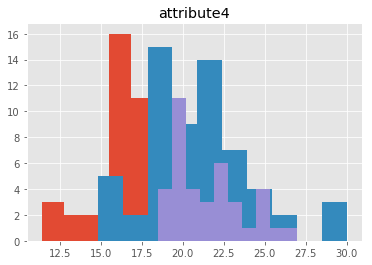

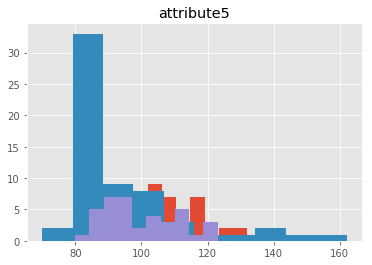

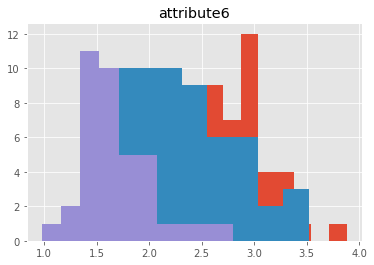

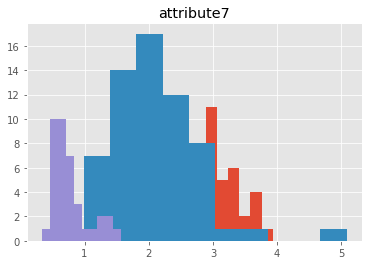

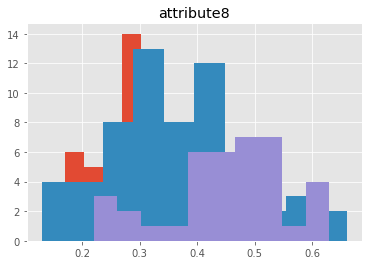

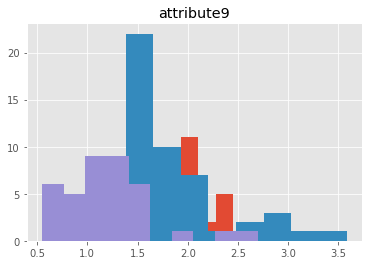

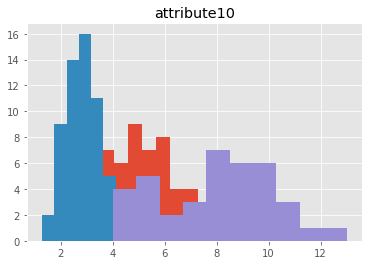

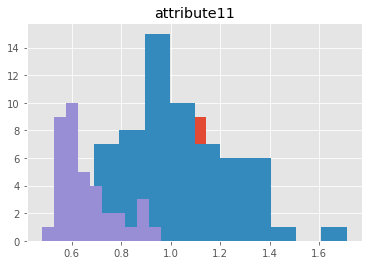

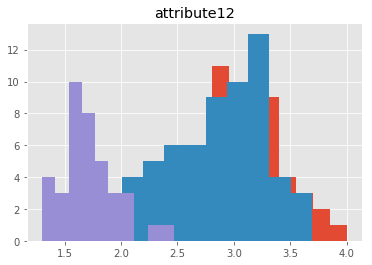

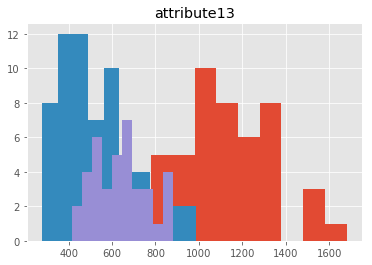

In [14]:
#the hist. of the attribute
att = []
for i in range(13):
    att.append(i+1)
    att[i] = str(att[i])
for i in range(13):
    plt.hist(hist1[i])
    plt.hist(hist2[i])
    plt.hist(hist3[i])
    plt.title('attribute'+att[i])
    plt.show()

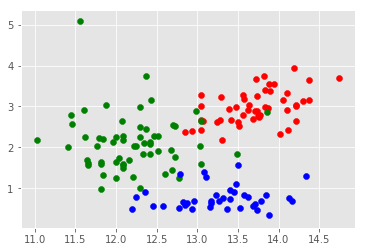

In [16]:
plt.scatter(hist1[0],hist1[6],color='r')
plt.scatter(hist2[0],hist2[6],color='g')
plt.scatter(hist3[0],hist3[6],color='b')
plt.show()

In [17]:
#use attribute1 & 7 to train
fi = pd.DataFrame()
a = np.ones((148,1))
fi[0] = train.loc[:,3]
fi[1] = train.loc[:,9]
fi = np.array(fi.values)
fi = np.concatenate((a,fi),axis=1)
a1 = pd.DataFrame()
a2 = pd.DataFrame()
a3 = pd.DataFrame()
w1 = np.zeros(shape=(1,3))
w2 = np.zeros(shape=(1,3))
w3 = np.zeros(shape=(1,3))
e1 = np.zeros(shape=(1,3))
e2 = np.zeros(shape=(1,3))
e3 = np.zeros(shape=(1,3))
E1 = pd.DataFrame()
E2 = pd.DataFrame()
E3 = pd.DataFrame()
h1_1 = np.zeros(shape=(1,3))
h1 = np.zeros(shape=(1,3))
h2_1 = np.zeros(shape=(1,3))
h2 = np.zeros(shape=(1,3))
h3_1 = np.zeros(shape=(1,3))
h3 = np.zeros(shape=(1,3))
y = pd.DataFrame()
y1 = pd.DataFrame()
y2 = pd.DataFrame()
y3 = pd.DataFrame()
for i in range(148):
    a1[i] = np.dot(w1,fi[i])
    a2[i] = np.dot(w2,fi[i])
    a3[i] = np.dot(w3,fi[i])
    y1[i] = np.exp(a1[i].values)/(np.exp(a1[i].values)+np.exp(a2[i].values)+np.exp(a3[i].values))
    y2[i] = np.exp(a2[i].values)/(np.exp(a1[i].values)+np.exp(a2[i].values)+np.exp(a3[i].values))
    y3[i] = np.exp(a3[i].values)/(np.exp(a1[i].values)+np.exp(a2[i].values)+np.exp(a3[i].values))
    E1[i] = (((y1[i]-t1[i]).values)*fi[i])
    E2[i] = (((y2[i]-t2[i]).values)*fi[i])
    E3[i] = (((y3[i]-t3[i]).values)*fi[i])
    e1 = e1+ E1[i].values
    e2 = e2+ E2[i].values
    e3 = e3+ E3[i].values
    h1_1 = ((y1[i].values)*(1-y1[i].values)*(fi[i][np.newaxis].T*fi[i]))
    h1 = h1+h1_1
    h2_1 = ((y2[i].values)*(1-y2[i].values)*(fi[i][np.newaxis].T*fi[i]))
    h2 = h2+h2_1
    h3_1 = ((y3[i].values)*(1-y3[i].values)*(fi[i][np.newaxis].T*fi[i]))
    h3 = h3+h3_1

In [18]:
# 牛頓法train w ,for 2 attributes
w_new1 = w1
w_new2 = w2
w_new3 = w3
error = []
error3 = [1,5]
error2 = 1
accu=[]
k=0
while(k<50):
    n=0
    error2 = 0
    w_new1 = w_new1 - np.dot(e1,inv(h1.transpose()))
    w_new2 = w_new2 - np.dot(e2,inv(h2.transpose()))
    w_new3 = w_new3 - np.dot(e3,inv(h3.transpose()))
    for i in range(148):
        a1[i] = np.dot(w_new1,fi[i])
        a2[i] = np.dot(w_new2,fi[i])
        a3[i] = np.dot(w_new3,fi[i])
        y1[i] = 1/(np.exp(a1[i].values-a1[i].values)+np.exp(a2[i].values-a1[i].values)+np.exp(a3[i].values-a1[i].values))
        y2[i] = 1/(np.exp(a1[i].values-a2[i].values)+np.exp(a2[i].values-a2[i].values)+np.exp(a3[i].values-a2[i].values))
        y3[i] = 1/(np.exp(a1[i].values-a3[i].values)+np.exp(a2[i].values-a3[i].values)+np.exp(a3[i].values-a3[i].values))
        #判別accuracy
        if (y1[i][0]>y2[i][0]):
            y[i] = y1[i]
            if(y[i][0]>y3[i][0]):
                y[i] = y1[i]
                if(y[i][0]==t1[i]):
                    n+=1
            else:
                y[i] = y3[i] 
                if(y[i][0]==t3[i]):
                    n+=1
        else:
            y[i] = y2[i]
            if(y[i][0]>y3[i][0]):
                y[i] = y2[i]
                if(y[i][0]==t2[i]):
                    n+=1
            else:
                y[i] = y3[i]
                if(y[i][0]==t3[i]):
                    n+=1
        if (y1[i][0]==0):
            y1[i]=10**-15
        if (y2[i][0]==0):
            y2[i]=10**-15
        if (y3[i][0]==0):
            y3[i]=10**-15
        error1 = -(t1[i]*log(y1[i])+t2[i]*log(y2[i])+t3[i]*log(y3[i]))
        error2 = error2+error1
    error.append(error2)
    error3.append(error2)
    #更新gradient E and Hessian matrix
    for i in range(148): 
        E1[i] = (((y1[i]-t1[i]).values)*fi[i])
        E2[i] = (((y2[i]-t2[i]).values)*fi[i])
        E3[i] = (((y3[i]-t3[i]).values)*fi[i])
        e1 = e1+ E1[i].values
        e2 = e2+ E2[i].values
        e3 = e3+ E3[i].values
        h1_1 = ((y1[i].values)*(1-y1[i].values)*(fi[i][np.newaxis].T*fi[i]))
        h1 = h1+h1_1
        h2_1 = ((y2[i].values)*(1-y2[i].values)*(fi[i][np.newaxis].T*fi[i]))
        h2 = h2+h2_1
        h3_1 = ((y3[i].values)*(1-y3[i].values)*(fi[i][np.newaxis].T*fi[i]))
        h3 = h3+h3_1
    accu.append(n/148)
    k+=1

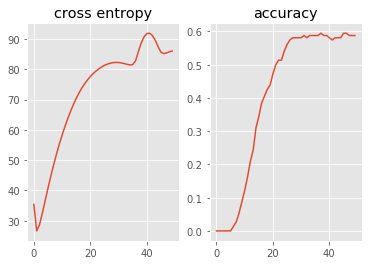

In [19]:
#plot accuracy and error_cross entropy
plt.style.use('ggplot')
plt.subplot(121)
plt.plot(range(len(error)),error)
plt.title('cross entropy')
plt.subplot(122)
plt.plot(range(len(accu)),accu)
plt.title('accuracy')
plt.show()

In [20]:
fi = pd.DataFrame()
c = []
a = np.ones((30,1))
fi[0] = test.loc[:,0]
fi[1] = test.loc[:,6]
fi = np.array(fi.values)
fi = np.concatenate((a,fi),axis=1)
for i in range(len(test)):
    a1[i] = np.dot(w_new1,fi[i])
    a2[i] = np.dot(w_new2,fi[i])
    a3[i] = np.dot(w_new3,fi[i])
    y1[i] = np.exp(a1[i].values)/(np.exp(a1[i].values)+np.exp(a2[i].values)+np.exp(a3[i].values))
    y2[i] = np.exp(a2[i].values)/(np.exp(a1[i].values)+np.exp(a2[i].values)+np.exp(a3[i].values))
    y3[i] = np.exp(a3[i].values)/(np.exp(a1[i].values)+np.exp(a2[i].values)+np.exp(a3[i].values))
    if(y1[i][0]>y2[i][0]):
        y[i] = y1[i]
        if(y[i][0]>y3[i][0]):
            c.append('class1')
        else:
            c.append('class3')
    else:
        y[i] = y2[i]
        if(y[i][0]>y3[i][0]):
            c.append('class2')
        else:
            c.append('class3')     

In [21]:
print(pd.DataFrame({'classification':c})[:10])
print(pd.DataFrame({'classification':c})[10:20])
print(pd.DataFrame({'classification':c})[20:])

  classification
0         class3
1         class3
2         class3
3         class3
4         class3
5         class3
6         class3
7         class3
8         class3
9         class3
   classification
10         class1
11         class2
12         class2
13         class3
14         class2
15         class2
16         class2
17         class3
18         class2
19         class1
   classification
20         class1
21         class1
22         class1
23         class1
24         class1
25         class1
26         class1
27         class1
28         class1
29         class1
